# Taller de problemas

## Práctica de filtrado
1.  Hagan un código que regrese la primera letra de cada palabra en una lista. (Output es una lista de las primeras letras).
2.  Hagan un código que regrese solamente las palábras con 5 letras o menos de una lista.
3.  Hagan un código que reciba una lista de precios en pesos y los convierta en dólares (Asumir que 20 pesos = 1 dólar).
4.  Si hicieron lo anterior con una función map, reduce o filter; hagan una comprensión.

## Trabajo del fin de Semana
1. Utilizando BeautifulSoup4; scrappea una página de mercado libre con las propiedades: (Nombre del producto, Precio, Precio original, numero de ventas). 
2. Ahora transforma los datos númericos para que sean de type(int) o type(float) en lugar de string 
3. Con esos datos, genera un dataframe.
4. Crea una nueva columna en donde conviertas el precio en pesos a dólares (1 dólar=20 pesos).
5. Guarda el dataframe en un archivo csv.
6. Usando BS4, crea una manera de acceder a las siguientes 2 páginas del departamento en donde te encuentres. (Mercadolibre con las mismas variables).
7. Scrappea las 3 páginas para tener una lista más grande.
8. Nuevamente transforma los datos numéricos para que sean int o float en lugar de string.
9. Genera un dataframe.
10. Crea una nueva columna en donde conviertas el precio de pesos a dólares (1 dólar=20 pesos).
11. Muestra un histograma de la distribución de los precios de celulares.


# Reto
1. Ahora repite el reto usando Scrapy: (Nombre del producto, Precio, Precio de descuento, número de ventas)
2. Usa los selectores que gustes
3. Exporta el archivo a csv
4. Importa el archivo csv a tu libreta de jupyter.

# PRÁCTICA DE FILTRADO RESUELTA

#### Hagan un código que regrese la primera letra de cada palabra en una lista. (Output es una lista de las primeras letras)

In [8]:
word_list = ["uno", "dos", "tres", "cuatro", "cinco", "seis", "siete", "ocho", "nueve", "diez"]
mapped_list = map(lambda word: word[0], word_list)
mapped_list_comprehension = [word[0] for word in word_list]

print(list(mapped_list))
print(mapped_list_comprehension)

['u', 'd', 't', 'c', 'c', 's', 's', 'o', 'n', 'd']
['u', 'd', 't', 'c', 'c', 's', 's', 'o', 'n', 'd']


#### Hagan un código que regrese solamente las palábras con 5 letras o menos de una lista

In [9]:
filtered_list = filter(lambda word: len(word) > 5, word_list)
filtered_list_comprehension = [word for word in word_list if len(word) > 5]

print(list(filtered_list))
print(filtered_list_comprehension)

['cuatro']
['cuatro']


#### Hagan un código que reciba una lista de precios en pesos y los convierta en dólares (Asumir que 20 pesos = 1 dólar)

In [10]:
pesos_list = [100, 120, 130, 140, 250, 290, 310, 330, 355, 400]
dollar_price = 20
dollars_list = map(lambda num: num*dollar_price, pesos_list)
dollars_list_comprehension = [num*dollar_price for num in pesos_list]

print(list(dollars_list))
print(dollars_list_comprehension)

[2000, 2400, 2600, 2800, 5000, 5800, 6200, 6600, 7100, 8000]
[2000, 2400, 2600, 2800, 5000, 5800, 6200, 6600, 7100, 8000]


#### Si hicieron lo anterior con una función map, reduce o filter; hagan una comprensión

# Trabajo del fin de semana resuelto

In [ ]:
#%pip install matplotlib

In [1]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import requests
import pandas as pd

In [2]:
def get_products_from_page(url):
    products = []
    products_request = requests.get(url)
    soup = BeautifulSoup(products_request.text, 'html.parser')

    all_li_tags = soup.select('ol#searchResults>li')
    for li_tag in all_li_tags:
        span_title_tag = li_tag.select('span.main-title')[0]
        title = span_title_tag.text

        div_price_container_tag = li_tag.select('div.price__container')[0]
        span_old_price_tag = div_price_container_tag.select('span.price-old del')
        if len(span_old_price_tag) > 0:
            dirty_old_price = span_old_price_tag[0].text
            clean_old_price = dirty_old_price[3:].strip()
            old_price = float(clean_old_price.replace(',', ''))
        else:
            old_price = None

        span_price_selector = 'div.item__price span.price__fraction'
        span_price_tag = div_price_container_tag.select(span_price_selector)[0]
        price_clean = span_price_tag.text.replace(',', '')
        price_float = float(price_clean)

        new_product_entry = {
            'name': title,
            'old_price': old_price,
            'price': price_float
        }

        products.append(new_product_entry)

    return products

In [6]:
def makeChart(products):
    max_price = products['price'].max()
    top_price = int(round(max_price, -3))
    step = 2000
    bins = [num for num in range(0, top_price + step, step)]
    plt.figure(figsize=(12,7))
    plt.style.use('fivethirtyeight')
    plt.hist(products['price'], bins=bins, edgecolor='black')
    plt.title('Precio de Laptops')
    plt.xlabel('Precios')
    plt.ylabel('Total de Laptops')
    plt.show()

In [4]:
def scrapeMercadoLibrePages(total_pages):
    try:
        assert total_pages < 11, 'Quieres scrapear demasiadas páginas, te aviso que no puedo scrapear más de 10'

        url_laptops = 'https://laptops.mercadolibre.com.mx/laptops-accesorios/'
        current_index = 1
        all_products = []
        last_page = total_pages + 1
        money_convertion = 20

        for page in range(1, last_page):
            if page == 1:
                url = 'https://laptops.mercadolibre.com.mx/laptops-accesorios/'
            else:
                quantity = current_index + 50
                paginator = '_Desde_{}'.format(quantity)
                url = '{}{}'.format(url_laptops, paginator)
                current_index = quantity

            products = get_products_from_page(url)
            all_products = all_products + products

        laptops_df = pd.DataFrame(all_products)
        laptops_df['dollars'] = laptops_df['price'] * money_convertion
        laptops_df.to_csv('mercado_libre.csv', header=True)

        makeChart(laptops_df)
    except AssertionError as error:
        print(error)
    except IndexError as error:
        print('Hay un producto que tiene etiquetas raras, chécalo: {}'.format(error))

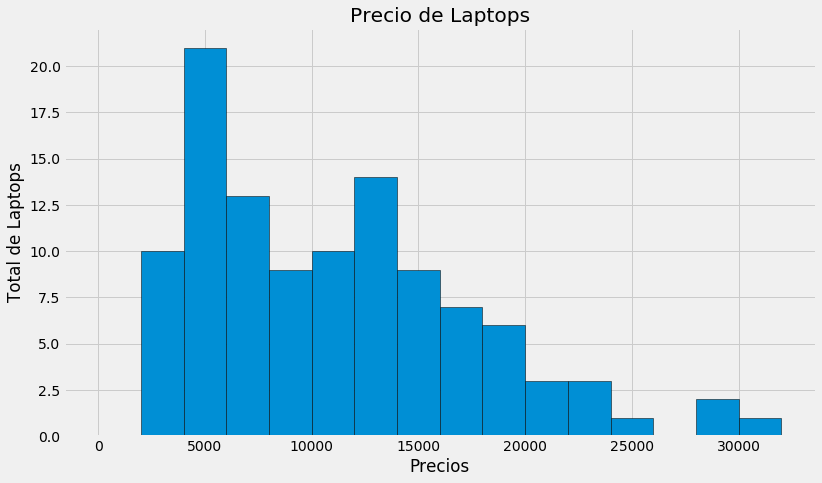

In [7]:
scrapeMercadoLibrePages(2)

# Otros sitios Scrapping
Aeropuerto Ciudad de México

http://www.ift.org.mx  (Para descargar datos ya hecho)

Despegar.com.mx

Trivago.com.mx

Coneval (Datos procesados)

http://premio.ceneval.edu.mx/premio_egel/index.jsf (Scrappear texto limpio y filtrado)

VivaAerobus.com
